In [1]:
import numpy as np
import matplotlib.pyplot as plt
import profile
import time
import pdb
#import unittest
import pylab as pl

## Exercise 1

In [2]:
#largest area is calculated by comparing the sides of rectangular cuboid and choosing the largest two of them
#assert function for debugging is used
#the function is then called for the values provided

In [3]:
def loop_largest_area(a,b,c):
    assert ((np.array([a,b,c])>0).all()), 'Error: Negative or zero length of sides not allowed'
    if a>b and a>c:
        if b>c:
            return a*b
        else:
            return a*c
    else:
        return b*c

def volume(a,b,c):
    assert ((np.array([a,b,c])>0).all()), 'Error: Negative or zero length of sides not allowed'
    return a*b*c

In [4]:
l = 30
b = 20
h = 10

In [5]:
print(f'area of largest face of the cuboid is: {loop_largest_area(l,b,h)} sq cm \nand the volume is: {volume(l,b,h)} cu cm')

area of largest face of the cuboid is: 600 sq cm 
and the volume is: 6000 cu cm


## Exercise 2

In [6]:
#largest area is calculated by arranging the sides in descending order and then choosing the first two element in that list
#debugging is done using assert function
#the function is then called for the values provided, and looped for the multiple length values provided as a list

In [7]:
def largest_area(a,b,c):
    assert ((np.array([a,b,c])>0).all()), 'Error: Negative or zero length of sides not allowed'
    li = [a,b,c]
    li.sort(reverse = True)
    return li[0]*li[1]

def volume(a,b,c):
    assert ((np.array([a,b,c])>0).all()), 'Error: Negative or zero length of sides not allowed'
    return a*b*c

In [8]:
l = [30,40,50]
b = 20
h = 15

In [9]:
for i in l:
    print(f'area of the largest face of the rectangular cuboid with given dimesnions is: {largest_area(i,b,h)} sq cm \nvolume for the rectangualr cuboid is: {volume(i,b,h)} cu cm')

area of the largest face of the rectangular cuboid with given dimesnions is: 600 sq cm 
volume for the rectangualr cuboid is: 9000 cu cm
area of the largest face of the rectangular cuboid with given dimesnions is: 800 sq cm 
volume for the rectangualr cuboid is: 12000 cu cm
area of the largest face of the rectangular cuboid with given dimesnions is: 1000 sq cm 
volume for the rectangualr cuboid is: 15000 cu cm


## Exercise 3

In [10]:
#info about unit testing and profiling modules in python

## Exercise 4

In [11]:
# mat_mul_vector - vectorised implementation for cross product of two matrices
# mat_mul_non_vect - non vectorised implementation
# A,B are randomly generated matrices of given order
# the two codes are run for sizes of matrices as provided
# time estimates are calculated using profilers (profile lib is imported at the start)
# we run a loop for all the 'n' values and record the time required for each run, that time is then plotted (time lib imported for the same)

In [12]:
def mat_mul_vect(n):  
    A = np.random.randint(10,size=(n,n))
    B = np.random.randint(10,size=(n,n))
    return np.dot(A,B)

def mat_mul_non_vect(n):
    A = np.random.randint(10,size=(n,n))
    B = np.random.randint(10,size=(n,n))
    res = np.zeros(shape=(n,n))
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                res[i][j] += A[i][k] * B[k][j]
    return res

In [13]:
n = [10,30,50,100,500,1000]

In [14]:
vect = [0.0, 0.0, 0.0, 0.0, 0.08556294441223145, 0.8455119132995605]
non_vect = [0.0, 0.01939988136291504, 0.08014416694641113, 0.5672757625579834, 91.34941577911377, 913.1556441783905]

- NOTE: These results were obtained from actually running the codes written below, but for non vectorised multiplication, n = 1000 took almost 15 mins, so I've commented out that part for a swift code run and quicker evaluation

In [15]:
vect = []
for i in n:
    start = time.time()
    mat_mul_vect(i)
    end = time.time()
    vect.append(end-start)
print(vect)

[0.0, 0.0, 0.0012118816375732422, 0.0011379718780517578, 0.1193544864654541, 1.039660930633545]


In [16]:
'''non_vect = []
for i in n:
    start = time.time()
    mat_mul_non_vect(i)
    end = time.time()
    vect.append(end-start)'''
print(non_vect)

[0.0, 0.01939988136291504, 0.08014416694641113, 0.5672757625579834, 91.34941577911377, 913.1556441783905]


- Note: Non vectorised matrix multiplication for n = 1000 roughly takes about 15 mins
- Better not to run it again, unless that much time can be spared!

In [17]:
profile.run('mat_mul_vect(1000)')

         28 function calls in 0.875 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.859    0.859 3975191504.py:1(mat_mul_vect)
        1    0.000    0.000    0.875    0.875 :0(exec)
        2    0.000    0.000    0.000    0.000 :0(getattr)
        3    0.828    0.276    0.828    0.276 :0(implement_array_function)
        2    0.000    0.000    0.000    0.000 :0(items)
        2    0.031    0.016    0.031    0.016 :0(randint)
        2    0.000    0.000    0.000    0.000 :0(reduce)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        1    0.000    0.000    0.828    0.828 <__array_function__ internals>:2(dot)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
        1    0.016    0.016    0.875    0.875 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2907(_prod_dispatcher)
        2    0.000    0.000    0.000 

In [18]:
profile.run('mat_mul_non_vect(50)')

         2577 function calls in 0.109 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.109    0.109    0.109    0.109 3975191504.py:6(mat_mul_non_vect)
        1    0.000    0.000    0.109    0.109 :0(exec)
        2    0.000    0.000    0.000    0.000 :0(getattr)
        2    0.000    0.000    0.000    0.000 :0(implement_array_function)
        2    0.000    0.000    0.000    0.000 :0(items)
     2551    0.000    0.000    0.000    0.000 :0(len)
        2    0.000    0.000    0.000    0.000 :0(randint)
        2    0.000    0.000    0.000    0.000 :0(reduce)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        1    0.000    0.000    0.000    0.000 :0(zeros)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
        1    0.000    0.000    0.109    0.109 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2907(_prod_dispatcher)
     

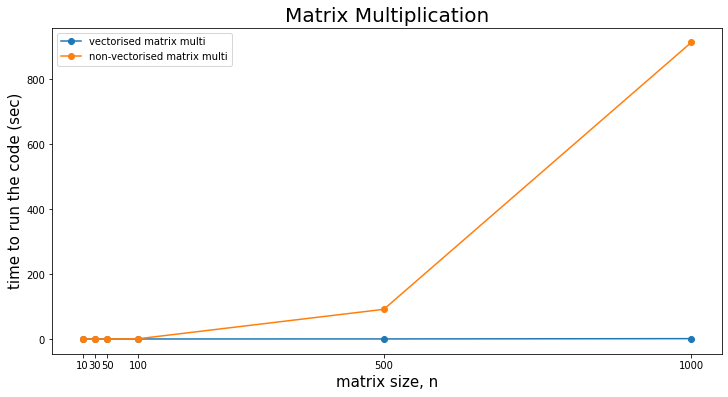

In [19]:
plt.figure(figsize = (12,6))
plt.plot(n,vect, '-o',label = 'vectorised matrix multi')
plt.plot(n,non_vect, '-o', label = 'non-vectorised matrix multi')
plt.title('Matrix Multiplication',fontsize=20)
plt.xlabel('matrix size, n',fontsize=15)
plt.ylabel('time to run the code (sec)',fontsize=15)
plt.xticks(n)
plt.legend()
plt.show()

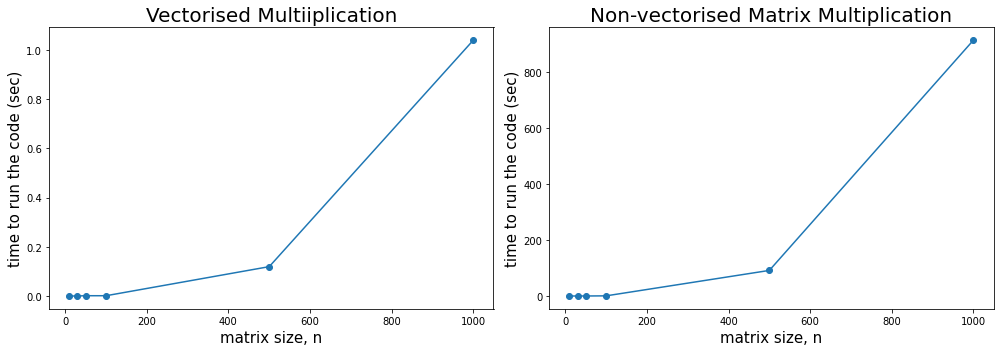

In [20]:
cols = [vect,non_vect]

plt.figure(figsize = (14,5))
c = 1

for i in cols:
    if c <= 2:
        ax = plt.subplot(1,2,c)
        plt.plot(n,i,'-o')
        plt.xlabel('matrix size, n',fontsize=15)
        plt.ylabel('time to run the code (sec)',fontsize=15)
    c += 1
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.set_title('Vectorised Multiiplication',fontsize=20)
ax2.set_title('Non-vectorised Matrix Multiplication',fontsize=20)


plt.tight_layout()
plt.show()

### Result :

> the trend is similar for both cases but the time required for non vectorised multiplication is very very large as compared to the vectorised matrix multiplication

## Exercise 5

<div>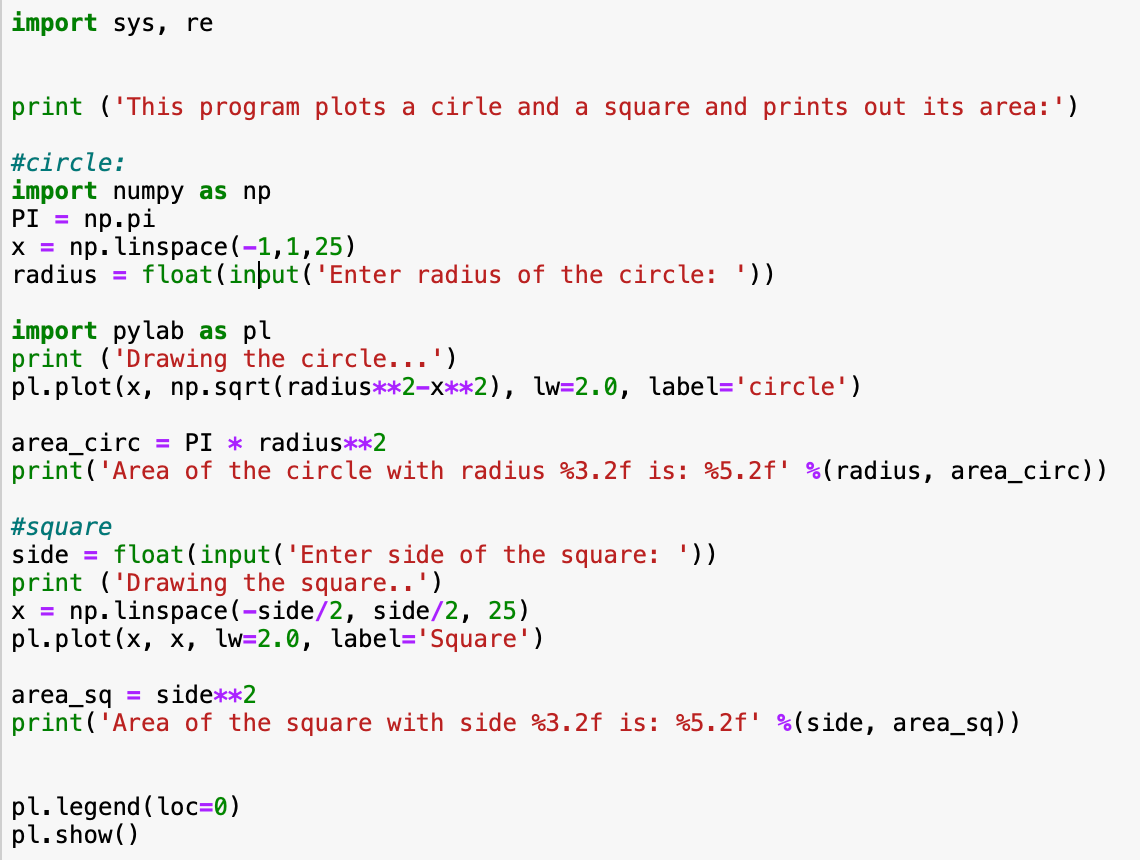</div>

In [21]:
# changes at appropriate places are made (debugged, restructured and refactored)
# the code is modified to yield the expected results
# pdb is used for debugging/refactoring

Enter radius of the circle: 10
Enter side of the square: 20
--Return--
None
> c:\users\dell\appdata\local\temp\ipykernel_5516\4211393579.py(6)<module>()

ipdb> c
Area of the circle with radius 10.00 is: 314.16
Area of square with side 20.00 is: 400.00


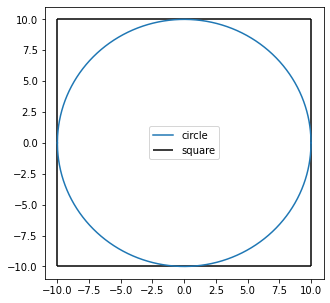

In [22]:
radius = float(input('Enter radius of the circle: '))
side = float(input('Enter side of the square: '))
assert (radius>0), 'Error: Negative or zero radius not allowed'
assert (side>0), 'Error: Negative or zero length of sides not allowed'

pdb.set_trace() #For debugging (alternatively use breakpoint())
pl.figure(figsize = (5,5))

#drawing a circle
PI = np.pi
x = np.linspace(-radius,radius,2500)
pl.plot(x, np.sqrt(radius**2-x**2), color=u'#1f77b4', label='circle') #u'#1f77b4' default color
pl.plot(x, -np.sqrt(radius**2-x**2), color=u'#1f77b4')

area_circ = PI * radius**2
print('Area of the circle with radius %3.2f is: %5.2f' %(radius, area_circ))

#drawing a square
x=np.linspace(-side/2, side/2, 25)
pl.vlines(x=side/2, ymin = -side/2, ymax = side/2, color='black',label='square')
pl.vlines(x=-side/2, ymin = -side/2, ymax = side/2, color='black')
pl.hlines(y=side/2, xmin = -side/2, xmax = side/2, color='black')
pl.hlines(y=-side/2, xmin = -side/2, xmax = side/2, color='black')

area_sq = side**2
print('Area of square with side %3.2f is: %5.2f' %(side, area_sq))

pl.legend()
pl.show()